<a href="https://colab.research.google.com/github/mrasifimran/Machine-Learning/blob/main/Our_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

### Train Test Splitting

In [ ]:
X = df.iloc[:,:-1] # : means all the rows, -1 means deducted the last col
y = df['Outcome']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

### Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential() # 10,1
model.add(Dense(20,activation='relu',input_shape=(8,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # binary, softmax

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                180       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test)) # batch_size=32

Epoch 1/5
20/20 [==============================] - 0s 4ms/step - loss: 1.0897 - accuracy: 0.5993 - val_loss: 1.2341 - val_accuracy: 0.5779
Epoch 2/5
20/20 [==============================] - 0s 4ms/step - loss: 1.0175 - accuracy: 0.6042 - val_loss: 1.2329 - val_accuracy: 0.5779
Epoch 3/5
20/20 [==============================] - 0s 4ms/step - loss: 0.9604 - accuracy: 0.6026 - val_loss: 1.1490 - val_accuracy: 0.5974
Epoch 4/5
20/20 [==============================] - 0s 3ms/step - loss: 0.9530 - accuracy: 0.6010 - val_loss: 1.1973 - val_accuracy: 0.5909
Epoch 5/5
20/20 [==============================] - 0s 4ms/step - loss: 0.9288 - accuracy: 0.6059 - val_loss: 1.0974 - val_accuracy: 0.6364


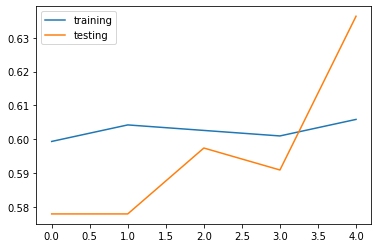

In [ ]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='testing')
plt.legend()